In [183]:
import numpy as np
import os
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

## Load CSV

In [200]:
path = os.getcwd() + '/dataset/NewDataset2.csv'
org_data = pd.read_csv(path)
org_data.drop(org_data.index[range(200)], inplace=True)
org_data

,S.NO,Name,Movie,Avg E,Avg H,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,...,SD_SC3,SD_SC4,SD_SC5,SD_SC6,Mean_Centroid,SD_Centroid,Mean_Flatness,SD_Flatness,PeakDensity,Tempo
200,201,Yaarukkum sollama,Azhaguraja,0.500000,0.500000,0.000497,0.006644,-0.034848,-1.626505e-02,-0.025865,...,0.173316,0.173534,0.193528,0.103656,0.175951,0.125826,0.029258,0.079650,4.095767,112.347147
201,202,Unna Paartha neram,Azhaguraja,0.416667,0.500000,-0.003818,-0.010853,-0.031980,-1.101638e-02,-0.052104,...,0.186353,0.176002,0.165530,0.108115,0.212496,0.096261,0.043214,0.063885,6.091530,95.703125
202,203,Melala Vedikudhu,Arambam,0.750000,0.750000,-0.013139,-0.001149,-0.007397,-3.199047e-03,-0.006375,...,0.182237,0.154914,0.167398,0.098896,0.283084,0.146976,0.112610,0.138895,5.434859,161.499023
203,204,Gangster,Billa 2,0.666667,0.750000,-0.010623,-0.012070,-0.004974,6.201689e-03,0.007334,...,0.132938,0.157558,0.167954,0.086933,0.249962,0.125837,0.091795,0.121524,4.069401,123.046875
204,205,Yedho Mayakkam,Billa 2,0.666667,0.583333,-0.013137,-0.019322,-0.020281,-3.082611e-03,-0.011484,...,0.200213,0.192222,0.166851,0.134286,0.311936,0.133984,0.098795,0.128806,5.193790,117.453835
205,206,Madurai Ponnu,Billa 2,0.416667,0.583333,-0.008790,-0.017163,-0.002402,-2.123991e-03,-0.023258,...,0.170121,0.183211,0.191161,0.126283,0.304173,0.140333,0.111554,0.105499,3.428828,123.046875
206,207,Yealae Yealae Dhosthu da,Endrendrum Punnagai,0.500000,0.750000,-0.019071,0.008142,0.007462,2.105271e-03,0.004207,...,0.182020,0.197419,0.158706,0.095687,0.344660,0.135532,0.106419,0.128041,5.646951,123.046875
207,208,Ennai Saaithale,Endrendrum Punnagai,0.250000,0.583333,-0.007261,0.007343,-0.021248,-9.548578e-03,-0.008511,...,0.167037,0.147478,0.169399,0.131575,0.325414,0.148660,0.041773,0.051076,2.787219,123.046875
208,209,Vaan Engum,Endrendrum Punnagai,0.583333,0.666667,-0.019570,0.014327,0.009607,-1.286953e-02,0.000436,...,0.177676,0.178602,0.197226,0.136431,0.462141,0.246295,0.116987,0.185252,5.416616,117.453835
209,210,Boomi Enna suthudhe,Ethirneechal,0.583333,0.583333,-0.008506,-0.010803,-0.009785,-7.652388e-03,-0.035040,...,0.167247,0.189606,0.162031,0.148584,0.220519,0.112628,0.070408,0.107218,4.014611,112.347147


In [201]:
mfcc_cols = ['MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6','MFCC7','MFCC8','MFCC9','MFCC10','MFCC11','MFCC12','MFCC13']
#'SD_SC0','SD_SC1','SD_SC2','SD_SC3','SD_SC4','SD_SC5','SD_SC6',
spectral_cols = ['Mean_SC0','Mean_SC1','Mean_SC2','Mean_SC3','Mean_SC4','Mean_SC5','Mean_SC6',
                 'Mean_Centroid','SD_Centroid','Mean_Flatness','SD_Flatness']
rhythm_cols = ['PeakDensity', 'Tempo']
old_mfcc = ['NMFCC1', 'NMFCC2', 'NMFCC3', 'NMFCC4', 'NMFCC5', 'NMFCC6','NMFC7','NMFCC8','NMFCC9','NMFCC10','NMFCC11','NMFCC12','NMFCC13']

## Pick relevant columns of data

In [302]:
X = np.array(pd.DataFrame(org_data, columns=spectral_cols+mfcc_cols))
## mood_values = np.array(pd.DataFrame(org_data, columns=['Happiness', 'Energy']))
y1 = np.array(pd.DataFrame(org_data, columns=['Avg E']))
y2 = np.array(pd.DataFrame(org_data, columns=['Avg H']))
##plt.plot(y1, y2, 'ro')
##plt.show()

Energy value:
MAError: 0.157996021137
MSError: 0.0359082345153
r2 Score: 0.3680600105

Happiness value:
MAError: 0.126577392813
MSError: 0.0241668966874
r2 Score: -0.107444349215


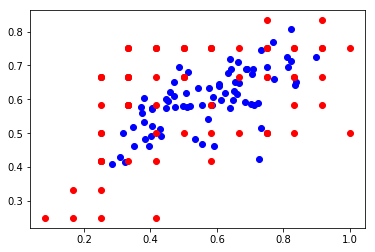

In [310]:
ktype = 'rbf'
g_val = 10
C_val = 1
svr_e = SVR(kernel=ktype, gamma = g_val, C = C_val) 
svr_h = SVR(kernel=ktype, gamma = g_val, C = C_val)

##svr_e = GridSearchCV(svr_model_e, cv = 5, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-1, 5, 10)}, scoring='r2')
##svr_h = GridSearchCV(svr_model_e, cv = 5, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-1, 5, 10)}, scoring='r2')

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1.ravel(), y2.ravel())
#Train the model using the training sets
svr_e.fit(X_train, y1_train)
svr_h.fit(X_train, y2_train)

#Predict the response for test dataset
y1_pred = svr_e.predict(X_test)
y2_pred = svr_h.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Energy value:")
print("MAError:",metrics.mean_absolute_error(y1_test, y1_pred))
print("MSError:",metrics.mean_squared_error(y1_test, y1_pred))
print("r2 Score:",metrics.r2_score(y1_test, y1_pred))
print("\nHappiness value:")
print("MAError:",metrics.mean_absolute_error(y2_test, y2_pred))
print("MSError:",metrics.mean_squared_error(y2_test, y2_pred))
print("r2 Score:",metrics.r2_score(y2_test, y2_pred))
plt.plot(y1_pred, y2_pred, 'bo')
plt.plot(y1_test, y2_test, 'ro')
plt.show()